# "Más Allá del Gol": Taller de Análisis de Datos de Fútbol

<img src="./assets/afiche-taller.jpeg" alt="Afiche del Taller" width="400" height="400">

Relator: Mg. Matthias Clein E.\
Fecha: 04 de abril de 2024\
Línea Integradora de Formación en Ingeniería y Ciencias\
Universidad de La Frontera, Temuco, Chile

## Pandas

Importamos la librería pandas con el alias *pd*.

In [1]:
import pandas as pd

Creamos un diccionario de ejemplo.

In [2]:
dict = {
    "a": [x for x in range(1, 11)],
    "b": [x for x in range(11, 21)],
    "c": [x for x in range(21, 31)]
}

Utilizamos ese diccionario para, a partir de su información, crear un DataFrame de pandas.

In [3]:
df = pd.DataFrame(dict)

Imprimimos por pantalla el DataFrame con su nombre o utilizando la función print.

In [4]:
df

,a,b,c
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25
5,6,16,26
6,7,17,27
7,8,18,28
8,9,19,29
9,10,20,30


Existe el método *.head()* que permite visualizar los primeros 5 registros. Si es necesario, podemos acceder a más registros indicando el número de registros entre los paréntesis del método.

In [5]:
df.head()

,a,b,c
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25


El método *.tail()* funciona de manera similar a *.head()* pero imprimiendo los últimos registros.

In [6]:
df.tail()

,a,b,c
5,6,16,26
6,7,17,27
7,8,18,28
8,9,19,29
9,10,20,30


Para obtener información del DataFrame, por ejemplo: cantidad de registros, nombres de las columnas, cantidad de datos por columna, tipos de datos por columnas, etc, se puede usar el método *.info()*.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       10 non-null     int64
 1   b       10 non-null     int64
 2   c       10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


El método *.describe()* entrega los estadísticos básicos para las columnas de tipo numérico.

In [8]:
df.describe()

,a,b,c
count,10.00000,10.00000,10.00000
mean,5.50000,15.50000,25.50000
std,3.02765,3.02765,3.02765
min,1.00000,11.00000,21.00000
25%,3.25000,13.25000,23.25000
50%,5.50000,15.50000,25.50000
75%,7.75000,17.75000,27.75000
max,10.00000,20.00000,30.00000


Con el atributo *.columns* obtenemos una lista con los nombres de las columnas del DataFrame.

In [9]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

Con *.iloc[]* podemos acceder a un registro según su índice numérico entero.

In [10]:
df.iloc[0]

a     1
b    11
c    21
Name: 0, dtype: int64

Si se quiere acceder a todos los valores de una determinada columna del DataFrame, se debe especificar su nombre entre corchetes.

In [11]:
df['a']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: a, dtype: int64

Si es necesario realizar una operación con todos los registros del DataFrame, se puede utilizar el método *.iterrows()* para generar un iterable que permita controlar un bucle for.

In [12]:
for i, row in df.iterrows():
    print(i)
    print(row.values)
    print("-" * 20)

0
[ 1 11 21]
--------------------
1
[ 2 12 22]
--------------------
2
[ 3 13 23]
--------------------
3
[ 4 14 24]
--------------------
4
[ 5 15 25]
--------------------
5
[ 6 16 26]
--------------------
6
[ 7 17 27]
--------------------
7
[ 8 18 28]
--------------------
8
[ 9 19 29]
--------------------
9
[10 20 30]
--------------------


## Statsbomb

Statsbomb es un proveedor de datos de fútbol que constantemente publica datos gratuitos con la finalidad de que la comunidad realice y comparta sus propios análisis. Para facilitar el acceso a los datos, Statsbomb desarrolló librerías para Python y R. El primer paso será instalar la librería.

In [13]:
%pip install statsbombpy

Note: you may need to restart the kernel to use updated packages.


Una vez instalada, se importa:

In [14]:
from statsbombpy import sb

El método *.competitions()* retorna el listado de competencias disponibles. Es importante identificar el *competition_id* y el *season_id* que permitirán posteriormente acceder a los partidos de la competencia. 

In [15]:
competitions = sb.competitions()
competitions

/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


Una vez que seleccionamos una competición e identificamos su *competition_id* y su *season_id*, a través del método *.matches()* podemos acceder a los partidos de dicha competición.

In [16]:
mundial_qatar = sb.matches(competition_id = 43, season_id = 106)
mundial_qatar

/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857265,2022-11-22,18:00:00.000,International - FIFA World Cup,2022,Mexico,Poland,0,0,available,...,2023-04-27T00:49:30.005344,1,Group Stage,Stadium 974,Chris Beath,Gerardo Daniel Martino,Czesław Michniewicz,1.1.0,2,2
60,3857262,2022-12-02,17:00:00.000,International - FIFA World Cup,2022,South Korea,Portugal,2,1,available,...,2023-04-26T23:48:08.999798,3,Group Stage,Education City Stadium,Facundo Tello Figueroa,Paulo Jorge Gomes Bento,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
61,3857261,2022-11-29,21:00:00.000,International - FIFA World Cup,2022,Wales,England,0,3,available,...,2023-04-27T00:02:44.241621,3,Group Stage,Ahmad bin Ali Stadium,Slavko Vinčić,Robert Page,Gareth Southgate,1.1.0,2,2
62,3857255,2022-12-01,21:00:00.000,International - FIFA World Cup,2022,Japan,Spain,2,1,available,...,2023-04-26T23:51:48.352990,3,Group Stage,Sheikh Khalifa International Stadium,Victor Miguel de Freitas Gomes,Hajime Moriyasu,Luis Enrique Martínez García,1.1.0,2,2


In [17]:
mundial_qatar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               64 non-null     int64 
 1   match_date             64 non-null     object
 2   kick_off               64 non-null     object
 3   competition            64 non-null     object
 4   season                 64 non-null     object
 5   home_team              64 non-null     object
 6   away_team              64 non-null     object
 7   home_score             64 non-null     int64 
 8   away_score             64 non-null     int64 
 9   match_status           64 non-null     object
 10  match_status_360       64 non-null     object
 11  last_updated           64 non-null     object
 12  last_updated_360       64 non-null     object
 13  match_week             64 non-null     int64 
 14  competition_stage      64 non-null     object
 15  stadium                64

In [18]:
mundial_qatar.describe()

,match_id,home_score,away_score,match_week
count,6.400000e+01,64.000000,64.000000,64.000000
mean,3.860294e+06,1.578125,1.109375,2.718750
std,5.267132e+03,1.551289,1.055856,1.537559
min,3.857254e+06,0.000000,0.000000,1.000000
25%,3.857270e+06,0.000000,0.000000,1.750000
50%,3.857286e+06,1.000000,1.000000,2.500000
75%,3.860255e+06,2.000000,2.000000,3.250000
max,3.869685e+06,7.000000,4.000000,7.000000


Probablemente no necesitemos la información de todos los partidos, por lo que será mejor filtrar. Basta establecer la o las condiciones dentro de los corchetes. En el ejemplo accederemos sólo a los partidos en que Argentina fue local o visitante.

In [19]:
mundial_qatar[(mundial_qatar["home_team"] == "Argentina") | (mundial_qatar["away_team"] == "Argentina")].sort_values(by = 'match_date')

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
37,3857300,2022-11-22,12:00:00.000,International - FIFA World Cup,2022,Argentina,Saudi Arabia,1,2,available,...,2023-06-19T15:59:46.628887,1,Group Stage,Lusail Stadium,Slavko Vinčić,Lionel Sebastián Scaloni,Hervé Renard,1.1.0,2,2
13,3857289,2022-11-26,21:00:00.000,International - FIFA World Cup,2022,Argentina,Mexico,2,0,available,...,2023-06-20T11:57:08.547882,2,Group Stage,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Gerardo Daniel Martino,1.1.0,2,2
11,3857264,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Poland,Argentina,0,2,available,...,2023-07-25T09:10:13.832053,3,Group Stage,Stadium 974,Danny Desmond Makkelie,Czesław Michniewicz,Lionel Sebastián Scaloni,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
6,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,...,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2


Para acceder a los eventos de un partido utilizaremos el método *.events()* entregándole como parámetro su *match_id* (que obtenemos desde los datos de los partidos).

In [20]:
holanda_argentina = sb.events(match_id = 3869321)

/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Se puede volver a filtrar para obtener sólo los eventos relacionados con uno de los dos equipos.

In [21]:
argentina = holanda_argentina[holanda_argentina["team"] == "Argentina"]

Observemos los nombres de las columnas para entender los datos.

In [22]:
argentina.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type',
       'id', 'index', 'injury_stoppage_in_chain', 'interception_outcome',
       'location', 'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assis

Podemos verificar los valores presentes en la columna *type* para conocer qué eventos y cuántos de cada uno de ellos existen en el DataFrame.

In [23]:
argentina['type'].value_counts()

Pass                 640
Ball Receipt*        620
Carry                514
Pressure             190
Ball Recovery         48
Duel                  43
Foul Won              37
Clearance             27
Foul Committed        22
Miscontrol            20
Shot                  19
Dribble               18
Goal Keeper           17
Block                 16
Dribbled Past         10
Interception          10
Dispossessed           8
Substitution           6
Injury Stoppage        6
Referee Ball-Drop      5
Half Start             5
Half End               5
Bad Behaviour          4
Tactical Shift         2
50/50                  2
Player On              1
Player Off             1
Starting XI            1
Name: type, dtype: int64

Filtramos sólo los tiros.

In [24]:
tiros_argentina = argentina[(argentina["period"] <= 2)& (argentina["type"] == "Shot")]

En la columna *location* se almacenan los puntos donde sucede la acción. Para facilitar el procesamiento, es mejor crear una columna con cada una de las componentes. 

In [25]:
tiros_argentina[["x", "y"]] = tiros_argentina["location"].apply(pd.Series)

/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_24052/2188016231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros_argentina[["x", "y"]] = tiros_argentina["location"].apply(pd.Series)
/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_24052/2188016231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros_argentina[["x", "y"]] = tiros_argentina["location"].apply(pd.Series)


## Matplotlib y mplsoccer

Para poder graficar utilizaremos la librería *matplotlib* y nos apoyaremos en *mplsoccer* que facilita generar campos de fútbol. 

In [26]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

Un ejemplo básico donde se genera un campo, de color verde, con las dimensiones de los datos de Statsbomb, con líneas blancas y diseño de franjas. Sobre este campo se aplica un gráfico de dispersión a partir de las coordenadas x e y con puntos de color celeste que representan los tiros de Argentina.

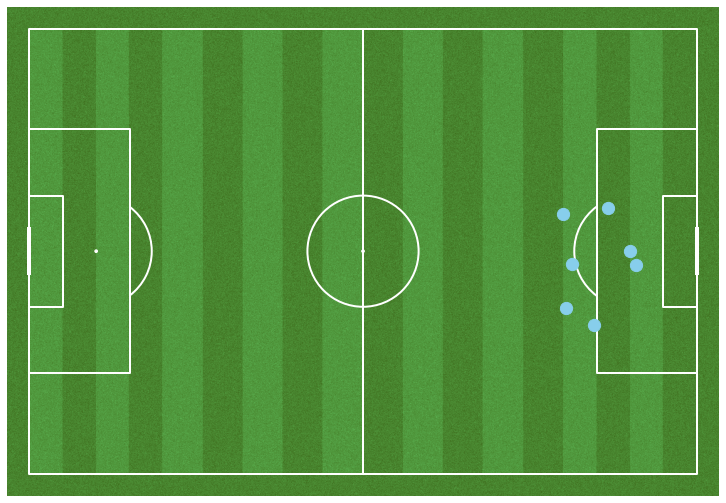

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (16, 9))
pitch = Pitch(pitch_color = "grass", pitch_type = 'statsbomb', line_color = "white", stripe = True)
pitch.draw(ax = ax)
ax.scatter(tiros_argentina["x"], tiros_argentina["y"], color = 'skyblue', s = 150)
plt.show()

Ahora filtramos los pases del equipo.

In [28]:
pases_argentina = argentina[argentina["type"] == "Pass"]

Como son muchos pases, también podemos filtrar los pases de un jugador específico.

In [29]:
pases_messi = pases_argentina[pases_argentina["player"] == "Lionel Andrés Messi Cuccittini"]

Los pases, a diferencia de los tiros, tienen un punto de inicio y uno de fin, por lo tanto tenemos que separar las componentes de ambos puntos en columnas distintas.

In [30]:
pases_messi[["x", "y"]] = pases_messi["location"].apply(pd.Series)
pases_messi[["x_end", "y_end"]] = pases_messi["pass_end_location"].apply(pd.Series)

/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_24052/4285172257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_messi[["x", "y"]] = pases_messi["location"].apply(pd.Series)
/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_24052/4285172257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_messi[["x", "y"]] = pases_messi["location"].apply(pd.Series)
/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_24052/4285172257.py:2: SettingWithCopyWarning: 
A value is tryi

También podemos separar los pases completos de los incompletos, filtrando por la característica de *pass_outcome*.

In [31]:
pases_messi_completos = pases_messi[~pases_messi["pass_outcome"].isin(["Incomplete", "Pass Offside"])]
pases_messi_incompletos = pases_messi[pases_messi["pass_outcome"].isin(["Incomplete", "Pass Offside"])]

Graficamos añadiendo algunos componentes estéticos: imagen, texto, leyendas y distinción por colores.

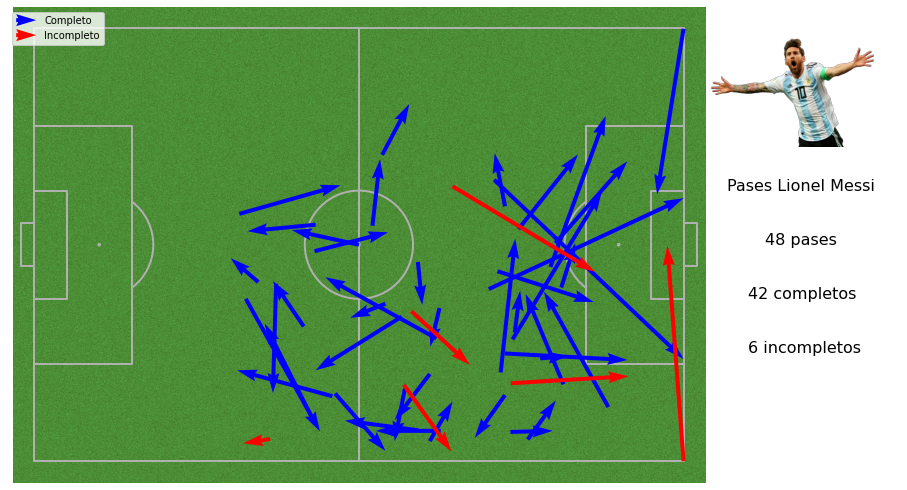

In [32]:
import matplotlib.image as mpimg
img = mpimg.imread('./assets/messi.png')

fig, ax = plt.subplots(figsize = (16,9))
pitch = Pitch(pitch_color = "grass", pitch_type = "statsbomb", goal_type = "box")
pitch.draw(ax = ax)
ax.imshow(img, extent=[125, 155, 22, 2])
pitch.arrows(pases_messi_completos["x"], pases_messi_completos["y"], pases_messi_completos["x_end"], pases_messi_completos["y_end"], ax = ax, color = "blue", label = "Completo")
pitch.arrows(pases_messi_incompletos["x"], pases_messi_incompletos["y"], pases_messi_incompletos["x_end"], pases_messi_incompletos["y_end"], ax = ax, color = "red", label = "Incompleto")
plt.xlim(-5, 160)
ax.text(128, 30, "Pases Lionel Messi", fontsize = 16)
ax.text(135, 40, f"{len(pases_messi)} pases", fontsize = 16)
ax.text(132, 50, f"{len(pases_messi_completos)} completos", fontsize = 16)
ax.text(132, 60, f"{len(pases_messi_incompletos)} incompletos", fontsize = 16)

plt.legend(loc = "upper left")
plt.show()

También se pueden filtrar los pases en el último tercio del campo. Para eso tomamos como referencia las coordenadas del campo de fútbol de Statsbomb.

<img src="./assets/statsbomb-pitch.png" alt="Dimensiones campo Statsbomb" width="600" height="400">

Filtramos los que están en el último tercio (x >= 80) y separamos por completos e incompletos.

In [33]:
pases_messi_ultimo_tercio = pases_messi[pases_messi['x'] >= 80]
pases_messi_ultimo_tercio_completos = pases_messi_ultimo_tercio[~pases_messi_ultimo_tercio["pass_outcome"].isin(["Incomplete", "Pass Offside"])]
pases_messi_ultimo_tercio_incompletos = pases_messi_ultimo_tercio[pases_messi_ultimo_tercio["pass_outcome"].isin(["Incomplete", "Pass Offside"])]

Graficamos añadiendo los mismos componentes estéticos utilizados anteriormente.

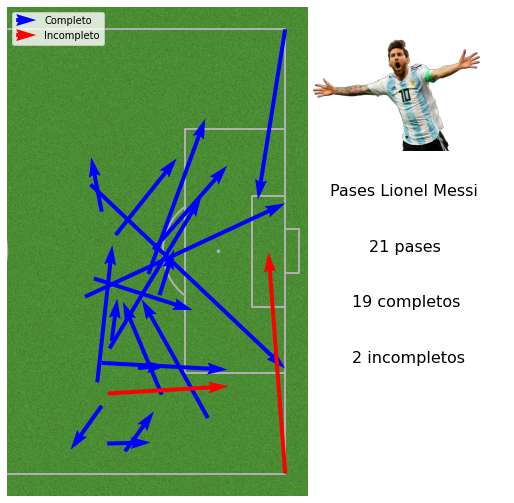

In [34]:
import matplotlib.image as mpimg
img = mpimg.imread('./assets/messi.png')
fig, ax = plt.subplots(figsize = (16,9))
pitch = Pitch(pitch_color = "grass", pitch_type = "statsbomb", goal_type = "box")
pitch.draw(ax = ax)
ax.imshow(img, extent=[125, 155, 22, 2])
pitch.arrows(pases_messi_ultimo_tercio_completos["x"], pases_messi_ultimo_tercio_completos["y"], pases_messi_ultimo_tercio_completos["x_end"], pases_messi_ultimo_tercio_completos["y_end"], ax = ax, color = "blue", label = "Completo")
pitch.arrows(pases_messi_ultimo_tercio_incompletos["x"], pases_messi_ultimo_tercio_incompletos["y"], pases_messi_ultimo_tercio_incompletos["x_end"], pases_messi_ultimo_tercio_incompletos["y_end"], ax = ax, color = "red", label = "Incompleto")
plt.xlim(70, 160)
ax.text(128, 30, "Pases Lionel Messi", fontsize = 16)
ax.text(135, 40, f"{len(pases_messi_ultimo_tercio)} pases", fontsize = 16)
ax.text(132, 50, f"{len(pases_messi_ultimo_tercio_completos)} completos", fontsize = 16)
ax.text(132, 60, f"{len(pases_messi_ultimo_tercio_incompletos)} incompletos", fontsize = 16)
plt.legend(loc = "upper left")
plt.show()

Cada tiro incluye el dato de su xG, utilizaremos esto para asignarle un tamaño a cada punto. Multiplicamos por un valor grande para que los tamaños sean coherentes con el tamaño de la gráfica, pues como se trata de un porcentaje son valores menores a 1.

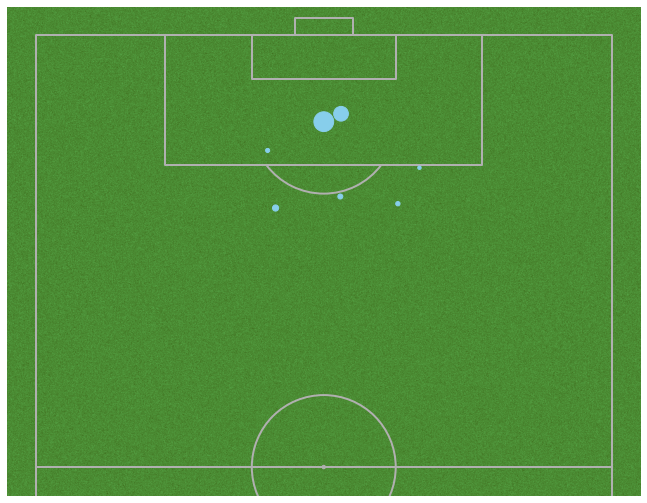

In [35]:
fig, ax = plt.subplots(figsize = (16,9))
pitch = VerticalPitch(pitch_color = "grass", pitch_type = "statsbomb", goal_type = "box", half = True)
pitch.draw(ax = ax)
pitch.scatter(tiros_argentina["x"], tiros_argentina["y"], ax = ax, s = tiros_argentina["shot_statsbomb_xg"]*500, color = 'skyblue')
plt.show()

# Otros análisis

## Ataque de Argentina y sus xG

In [36]:
tiros_argentina["shot_statsbomb_xg"].sort_values(ascending = False)

4519    0.783500
4516    0.434423
4518    0.076083
4515    0.049763
4513    0.037833
4517    0.033870
4512    0.023771
Name: shot_statsbomb_xg, dtype: float64

In [37]:
goles_argentina = tiros_argentina[tiros_argentina["shot_outcome"] == "Goal"]
no_goles_argentina = tiros_argentina[tiros_argentina["shot_outcome"] != "Goal"]

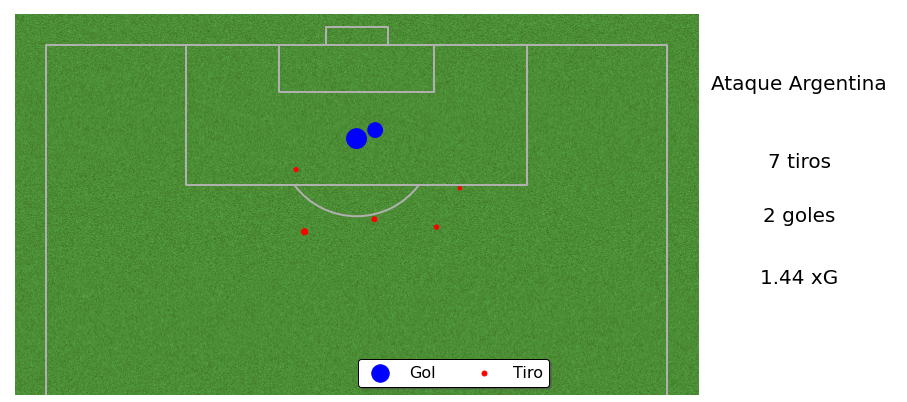

In [38]:
fig, ax = plt.subplots(figsize = (16,9))
pitch = VerticalPitch(pitch_color = "grass", pitch_type = "statsbomb", goal_type = "box")
pitch.draw(ax = ax)
pitch.scatter(goles_argentina["x"], goles_argentina["y"], ax = ax, s = goles_argentina["shot_statsbomb_xg"]*500, color = "blue", label = "Gol")
pitch.scatter(no_goles_argentina["x"], no_goles_argentina["y"], ax = ax, s = no_goles_argentina["shot_statsbomb_xg"]*500, color = "red", label = "Tiro")
plt.legend(ncol = 2, loc = "lower center", shadow = True, edgecolor = "black", prop = {"size": 16})
plt.xlim(-5, 110)
plt.ylim(75, 125)
ax.text(97, 115, "Ataque Argentina", va = "center", ha = "center", fontsize = 20)
ax.text(97, 105, f"{len(tiros_argentina)} tiros", va = "center", ha = "center", fontsize = 20)
ax.text(97, 98, f"{len(goles_argentina)} goles", va = "center", ha = "center", fontsize = 20)
ax.text(97, 90, f"{round(tiros_argentina['shot_statsbomb_xg'].sum(), 2)} xG", va = "center", ha = "center", fontsize = 20)
plt.show()

## Posicionamiento medio

In [39]:
argentina[['x', 'y']] = argentina['location'].apply(pd.Series)

/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_24052/3770061478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina[['x', 'y']] = argentina['location'].apply(pd.Series)
/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_24052/3770061478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina[['x', 'y']] = argentina['location'].apply(pd.Series)


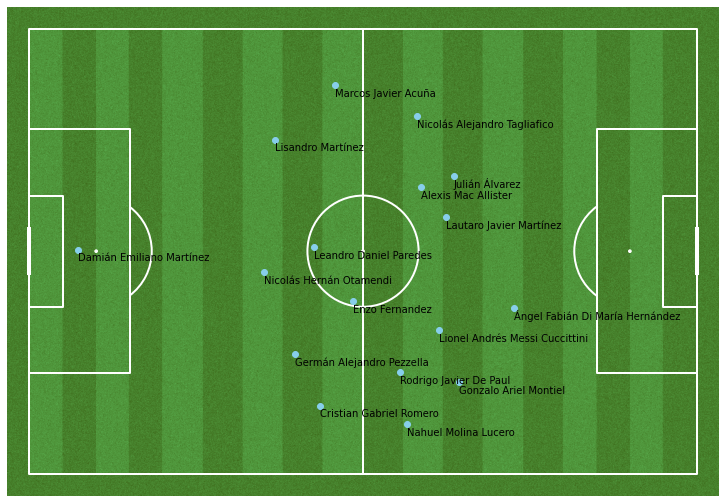

In [40]:
mean_positions = argentina.groupby(by = 'player').mean()[['x', 'y']]
fig, ax = plt.subplots(1, 1, figsize = (16, 9))
pitch = Pitch(pitch_color = "grass", pitch_type = 'statsbomb', line_color = "white", stripe = True)
pitch.draw(ax = ax)
ax.scatter(mean_positions["x"], mean_positions["y"], color = 'skyblue', label = mean_positions.index)
for i, txt in enumerate(mean_positions['x'].keys()):
    ax.annotate(txt, (mean_positions.iloc[i]['x'], mean_positions.iloc[i]['y'] + 2))
plt.show()